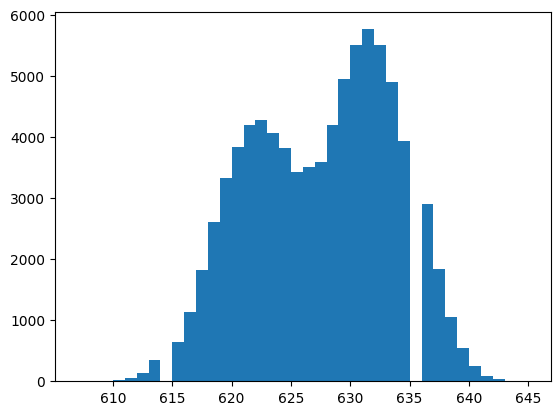

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

data = pl.read_csv(
    "./sensor_data_600.txt",
    separator=" ",
    has_header=False,
    new_columns=["date", "time", "ir", "lidar"],
)
plt.hist(data["lidar"], bins=max(data["lidar"]) - min(data["lidar"]))
plt.show()

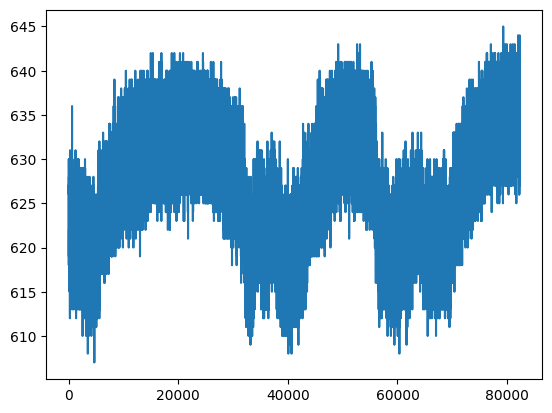

In [121]:
plt.plot(data["lidar"])
plt.show()

In [122]:
data

date,time,ir,lidar
i64,i64,i64,i64
20180202,110001,28,627
20180202,110004,17,626
20180202,110007,14,627
20180202,110010,31,622
20180202,110013,24,630
…,…,…,…
20180205,84216,39,634
20180205,84220,13,637
20180205,84222,37,633


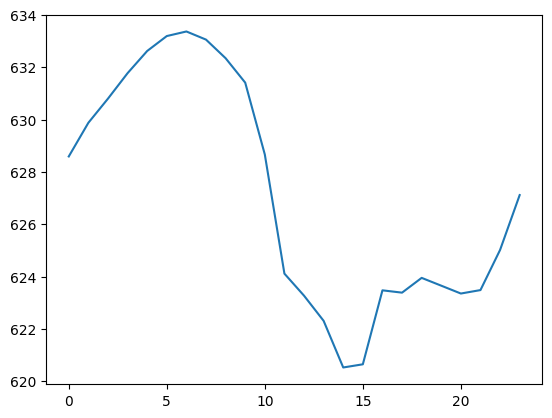

In [123]:
data.insert_column(3, (data["time"] // 10000).alias("hour"))
d = data.group_by("hour").mean().sort("hour")
plt.plot(d["hour"], d["lidar"])
plt.show()

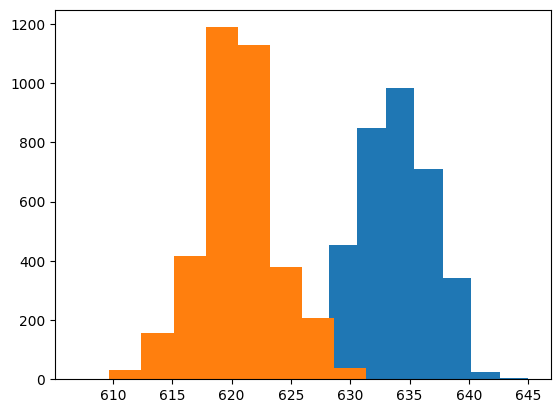

In [124]:
plt.hist(data["lidar"].filter(data["hour"] == 6))
plt.hist(data["lidar"].filter(data["hour"] == 14))
plt.show()

In [ ]:
each_hour = [
    data["lidar"].filter(data["hour"] == i).value_counts(name=str(i)) for i in range(24)
]
freqs = pl.concat(each_hour, how="align")
freqs = freqs.fill_null(0)
probs = freqs["0":] / len(data)
probs.insert_column(0, freqs["lidar"])
probs

lidar,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000012,0.0,0.0,0.0,0.0,0.0,0.000012,0.000012,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.000024,0.0,0.0,0.0,0.0,0.0,0.000012,0.000012,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024,0.000061,0.000036,0.000049,0.0,0.0,0.000012,0.000012,0.000134,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000012,0.000097,0.000146,0.000122,0.0,0.0,0.0,0.000024,0.000073,0.000146,0.000049,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
641,0.000012,0.000012,0.000024,0.000085,0.000109,0.000255,0.000194,0.000194,0.000073,0.000024,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,0.000012,0.000012,0.000012,0.000036,0.000061,0.000024,0.000122,0.000085,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012
643,0.0,0.0,0.0,0.0,0.000024,0.0,0.000024,0.000049,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


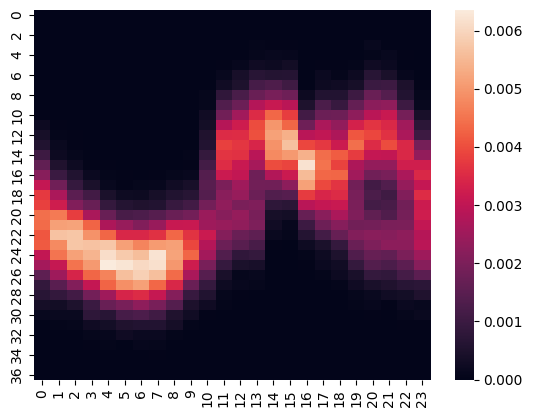

In [ ]:
import seaborn as sns

sns.heatmap(probs["0":])
plt.show()

In [127]:
# sns.jointplot(data, x="hour", y="lidar", kind="kde")
# plt.show()

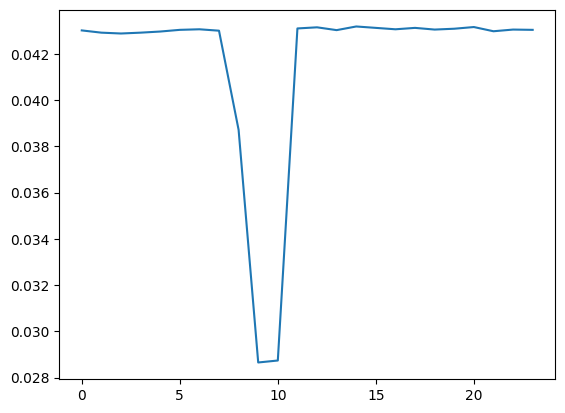

In [128]:
p_t = pl.DataFrame(probs.sum())[[str(i) for i in range(24)]].transpose()
plt.plot(p_t)
plt.show()

In [129]:
p_t.sum()

column_0
f64
1.0


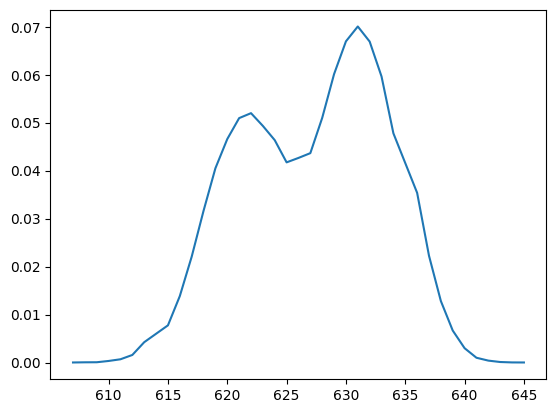

In [130]:
p_z_series = freqs[[str(i) for i in range(24)]].fold(lambda x, y: x + y).alias("probs")
p_z_series /= len(data)

p_z = p_z_series.to_frame()
p_z.insert_column(0, freqs["lidar"])

plt.plot(p_z["lidar"], p_z["probs"])
plt.show()

In [131]:
p_z.sum()

lidar,probs
i64,f64
23165,1.0


In [ ]:
cond_z_t = probs.with_columns(
    [pl.col(str(i)) / divisor for i, divisor in zip(range(24), p_t["column_0"])]
)
cond_z_t

lidar,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000282,0.000281,0.0,0.0,0.0,0.0,0.0,0.000282,0.000283,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000282,0.0,0.000564,0.0,0.0,0.0,0.0,0.0,0.000283,0.000282,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000563,0.001412,0.000844,0.001127,0.0,0.0,0.000282,0.000282,0.003097,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000282,0.000282,0.002259,0.003376,0.002818,0.0,0.0,0.0,0.000564,0.001689,0.003393,0.001129,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
641,0.000282,0.000283,0.000567,0.001982,0.002545,0.005929,0.004515,0.004521,0.001883,0.000848,0.000423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,0.000282,0.000283,0.000283,0.000849,0.001414,0.000565,0.002822,0.001978,0.000628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000282
643,0.0,0.0,0.0,0.0,0.000566,0.0,0.000564,0.00113,0.000314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


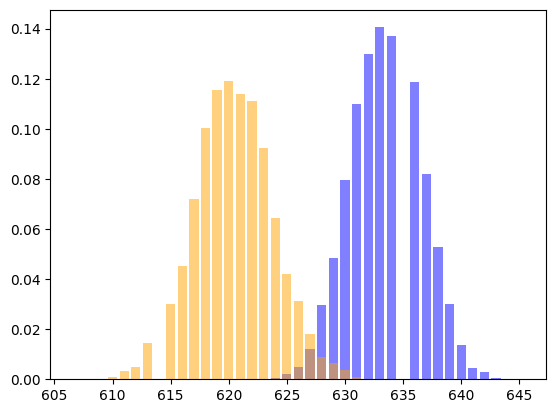

In [133]:
plt.bar(cond_z_t["lidar"], cond_z_t["6"], color="blue", alpha=0.5)
plt.bar(cond_z_t["lidar"], cond_z_t["14"], color="orange", alpha=0.5)
plt.show()

In [ ]:
cond_t_z = (
    probs.with_columns(
        pl.selectors.exclude("lidar") / pl.sum_horizontal(pl.selectors.exclude("lidar"))
    )
    .with_columns(pl.col("lidar").cast(pl.String))
    .transpose(
        include_header=True,
        header_name="index",
        column_names="lidar",
    )
)

print("P(z=630) =", p_z["probs"].filter(p_z["lidar"] == 630)[0])
print("P(t=13) =", p_t.row(13)[0])
print("P(t=13 | z = 630) =", cond_t_z["630"][13])
print(
    "Bayes P(t=13 | z = 630) =",
    cond_t_z["630"][13] * p_z["probs"].filter(p_z["lidar"] == 630)[0] / p_t.row(13)[0],
)
print("answer P(z=630 | t=13) =", cond_z_t.filter(p_z["lidar"] == 630)["13"][0])

P(z=630) = 0.06694936878045224
P(t=13) = 0.043024993620976656
P(t=13 | z = 630) = 0.023230490018148822
Bayes P(t=13 | z = 630) = 0.036147980796385204
answer P(z=630 | t=13) = 0.036147980796385204


In [ ]:
def bayes_estimation(sensor_value: int, current_estimation: pl.Series):
    new_estimation = []
    for i in range(24):
        new_estimation.append(
            (
                cond_z_t.filter(cond_z_t["lidar"] == sensor_value)[str(i)]
                * current_estimation[i]
            )[0]
        )
    return pl.Series(new_estimation) / sum(new_estimation)

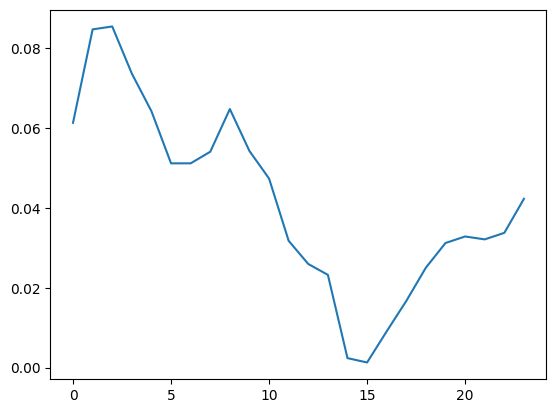

In [169]:
estimation = bayes_estimation(630, p_t["column_0"])
plt.plot(estimation)
plt.show()

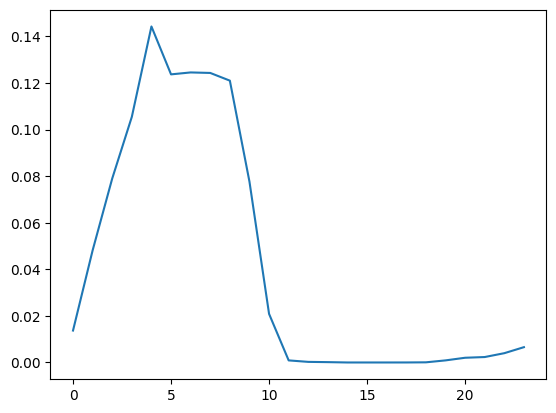

In [ ]:
values_5 = [630, 632, 636]
estimation = p_t["column_0"]
for v in values_5:
    estimation = bayes_estimation(v, estimation)

plt.plot(estimation)
plt.show()

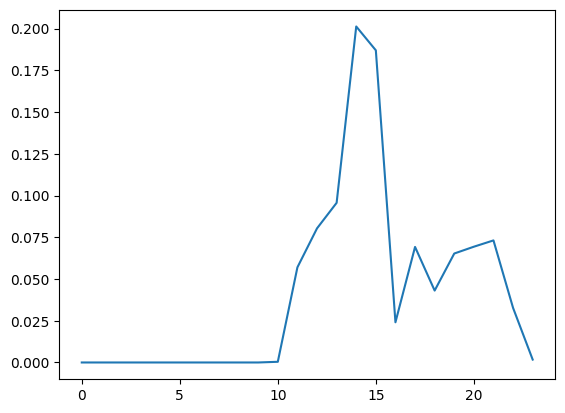

In [173]:
values_11 = [617, 624, 619]
estimation = p_t["column_0"]
for v in values_11:
    estimation = bayes_estimation(v, estimation)

plt.plot(estimation)
plt.show()